In [218]:
import pandas as pd
import seaborn as sns
import math

### Importing the EPL dataset

In [253]:
data = pd.read_csv("EPL_Set.csv")

### Data exploration to check for NaN values and fill them

In [254]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
Div         9664 non-null object
Date        9664 non-null object
HomeTeam    9664 non-null object
AwayTeam    9664 non-null object
FTHG        9664 non-null int64
FTAG        9664 non-null int64
FTR         9664 non-null object
HTHG        8740 non-null float64
HTAG        8740 non-null float64
HTR         8740 non-null object
Season      9664 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


 We find that the columns "HTHG", "HTAG" and "HTR" are incomplete and plot a heatmap of the dataset below to visualize them better.

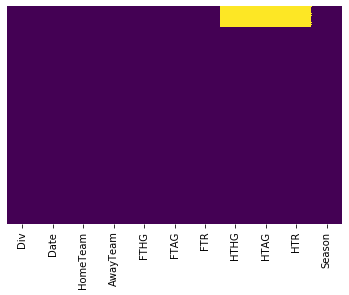

In [256]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)


We fill the "HTHG" and "HTAG" columns having NaN values with the mean value of the respective coloumns and then perform some data corrections to omit any abnormality. 

In [257]:
data["HTHG"]=data["HTHG"].fillna(value=math.ceil(data["HTHG"].mean()))

In [258]:
data["HTAG"]=data["HTAG"].fillna(value=math.ceil(data["HTAG"].mean()))

In [259]:
def hthg(cols):
    HTHG=cols[0]
    FTHG=cols[1]
    if FTHG == 0:
        return 0
    else:
        return HTHG

In [260]:
def htag(cols):
    HTAG=cols[0]
    FTAG=cols[1]
    if FTAG == 0:
        return 0
    else:
        return HTAG

In [261]:
data["HTHG"]=data[["HTHG","FTHG"]].apply(hthg,axis=1)

In [262]:
data["HTAG"]=data[["HTAG","FTAG"]].apply(hthg,axis=1)

In [263]:
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,0.0,1.0,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,0.0,1.0,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,1.0,1.0,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,0.0,1.0,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,0.0,1.0,NaN,1993-94


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
Div         9664 non-null object
Date        9664 non-null object
HomeTeam    9664 non-null object
AwayTeam    9664 non-null object
FTHG        9664 non-null int64
FTAG        9664 non-null int64
FTR         9664 non-null object
HTHG        9664 non-null float64
HTAG        9664 non-null float64
HTR         8740 non-null object
Season      9664 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


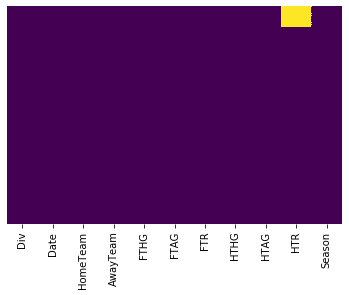

In [265]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)

We can see from above that only the "HTR" columns have NaN values now. We write a function for it and fill in the values instead of NaN using the "HTHG" and "HTAG" coloumns.

In [266]:
def htr(cols):
    HTR=cols[0]
    HTHG=cols[1]
    HTAG=cols[2]
    if pd.isnull(HTR):
        if HTHG>HTAG:
            return "H"
        elif HTAG>HTHG:
            return "A"
        else:
            return "D"
    else:
        return HTR

In [267]:
data["HTR"]=data[["HTR","HTHG","HTAG"]].apply(htr,axis=1)

In [268]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,A,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,D,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,D,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,D,1993-94


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
Div         9664 non-null object
Date        9664 non-null object
HomeTeam    9664 non-null object
AwayTeam    9664 non-null object
FTHG        9664 non-null int64
FTAG        9664 non-null int64
FTR         9664 non-null object
HTHG        9664 non-null float64
HTAG        9664 non-null float64
HTR         9664 non-null object
Season      9664 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


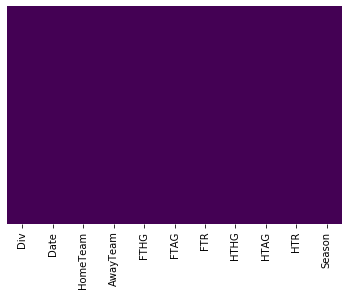

In [270]:
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)

Now all NaN values in the dataset have been filled and we can proceed with our complete dataset.

#### Since we have a complete dataset, we need to convert the string entries to entries that can be accepted by the model.

We will first convert the "HTR" and "FTR" columns and produce dummies for them

HTR column conversion and column order re-adjustments.

In [271]:
b=pd.get_dummies(data["HTR"],prefix="HTR")
data=pd.concat([data,b],axis=1)

In [272]:
data.drop("HTR",axis=1,inplace=True)
m=data["Season"]
data.drop("Season",axis=1,inplace=True)
data.insert(12,"Season",m)

In [273]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,1,0,0,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,0,1,0,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,0,1,0,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,0,0,1,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,0,1,0,1993-94


FTR column conversion and column reordering

In [274]:
bb=pd.get_dummies(data["FTR"],prefix="FTR")
data = pd.concat([data,bb],axis=1)

In [275]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season,FTR_A,FTR_D,FTR_H
0,E0,14/08/93,Arsenal,Coventry,0,3,A,0.0,1.0,1,0,0,1993-94,1,0,0
1,E0,14/08/93,Aston Villa,QPR,4,1,H,1.0,1.0,0,1,0,1993-94,0,0,1
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,1.0,1.0,0,1,0,1993-94,1,0,0
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,0,0,1,1993-94,0,0,1
4,E0,14/08/93,Man City,Leeds,1,1,D,1.0,1.0,0,1,0,1993-94,0,1,0


In [276]:
def moveTheCols(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [277]:
data=moveTheCols(data,["FTR_A","FTR_D","FTR_H"],"FTR","After")

In [278]:
data.drop("FTR",axis=1,inplace=True)

In [279]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR_A,FTR_D,FTR_H,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,1,0,0,0.0,1.0,1,0,0,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,0,0,1,1.0,1.0,0,1,0,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,1,0,0,1.0,1.0,0,1,0,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,0,0,1,1.0,0.0,0,0,1,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,0,1,0,1.0,1.0,0,1,0,1993-94


Dropping columns deemed not necessary

In [280]:
data.drop("Div",axis=1,inplace=True)
data.drop("Date",axis=1,inplace=True)

Converting data type to int for better readabilty.

In [281]:
data["HTHG"]=data["HTHG"].astype(int)
data["HTAG"]=data["HTAG"].astype(int)

In [282]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR_A,FTR_D,FTR_H,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season
0,Arsenal,Coventry,0,3,1,0,0,0,1,1,0,0,1993-94
1,Aston Villa,QPR,4,1,0,0,1,1,1,0,1,0,1993-94
2,Chelsea,Blackburn,1,2,1,0,0,1,1,0,1,0,1993-94
3,Liverpool,Sheffield Weds,2,0,0,0,1,1,0,0,0,1,1993-94
4,Man City,Leeds,1,1,0,1,0,1,1,0,1,0,1993-94


Converting "Season" column from object type to a suitable type that can be accepted by the model 

In [285]:
new=[]
end=[]
for index in data["Season"]:
    new.append(index.split("-")[0])
    end.append(index.split("-")[1])

In [290]:
data["Season S_Year"]=new
data["Season E_Year"]=end
data.drop("Season",axis=1,inplace=True)

In [293]:
data["Season S_Year"]=data["Season S_Year"].astype(int)
data["Season E_Year"]=data["Season E_Year"].astype(int)

In [296]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR_A,FTR_D,FTR_H,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season S_Year,Season E_Year
0,Arsenal,Coventry,0,3,1,0,0,0,1,1,0,0,1993,94
1,Aston Villa,QPR,4,1,0,0,1,1,1,0,1,0,1993,94
2,Chelsea,Blackburn,1,2,1,0,0,1,1,0,1,0,1993,94
3,Liverpool,Sheffield Weds,2,0,0,0,1,1,0,0,0,1,1993,94
4,Man City,Leeds,1,1,0,1,0,1,1,0,1,0,1993,94


In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 14 columns):
HomeTeam         9664 non-null object
AwayTeam         9664 non-null object
FTHG             9664 non-null int64
FTAG             9664 non-null int64
FTR_A            9664 non-null uint8
FTR_D            9664 non-null uint8
FTR_H            9664 non-null uint8
HTHG             9664 non-null int32
HTAG             9664 non-null int32
HTR_A            9664 non-null uint8
HTR_D            9664 non-null uint8
HTR_H            9664 non-null uint8
Season S_Year    9664 non-null int32
Season E_Year    9664 non-null int32
dtypes: int32(4), int64(2), object(2), uint8(6)
memory usage: 509.7+ KB
